# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [411]:
file_path = "../Exam_Score_Prediction_raw.csv"
df = pd.read_csv(file_path)

df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [413]:
df.shape

(20000, 13)

In [414]:
df.isnull().sum()

student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [415]:
df.duplicated().sum()

np.int64(0)

In [416]:
df.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


### Distribusi Fitur Numerik

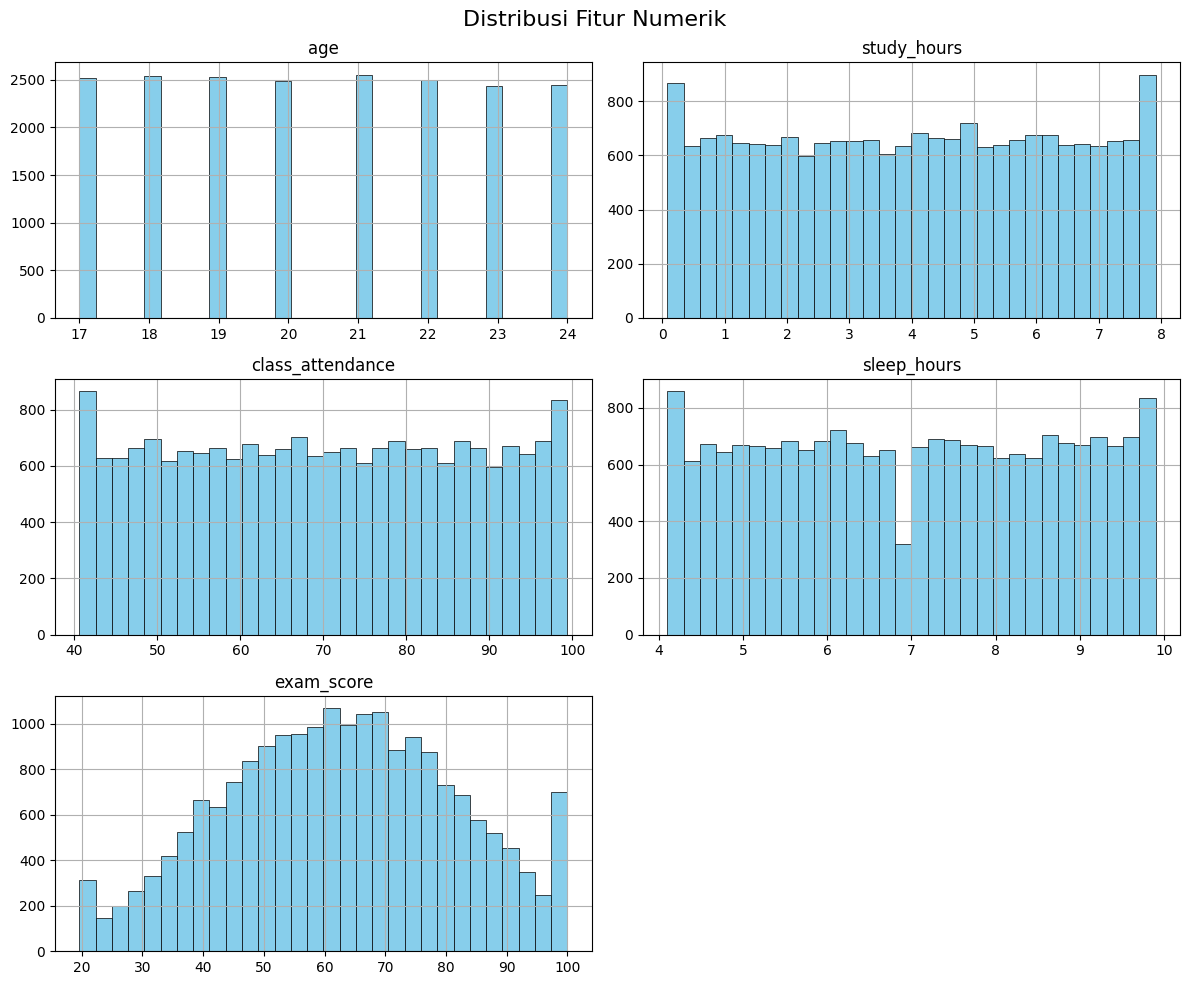

In [417]:
# kolom numerik
numerical_columns = df.select_dtypes(include=np.number).columns.drop('student_id')

df[numerical_columns].hist(figsize=(12, 10), bins=30, edgecolor='black', linewidth=0.5, color='skyblue')
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.tight_layout()
plt.show()

### Distribusi Fitur Kategorikal

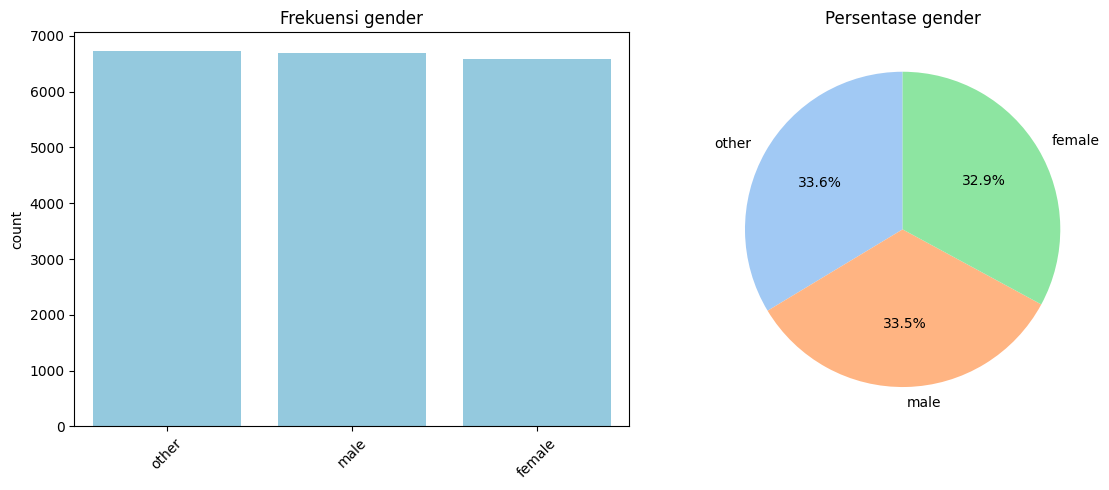

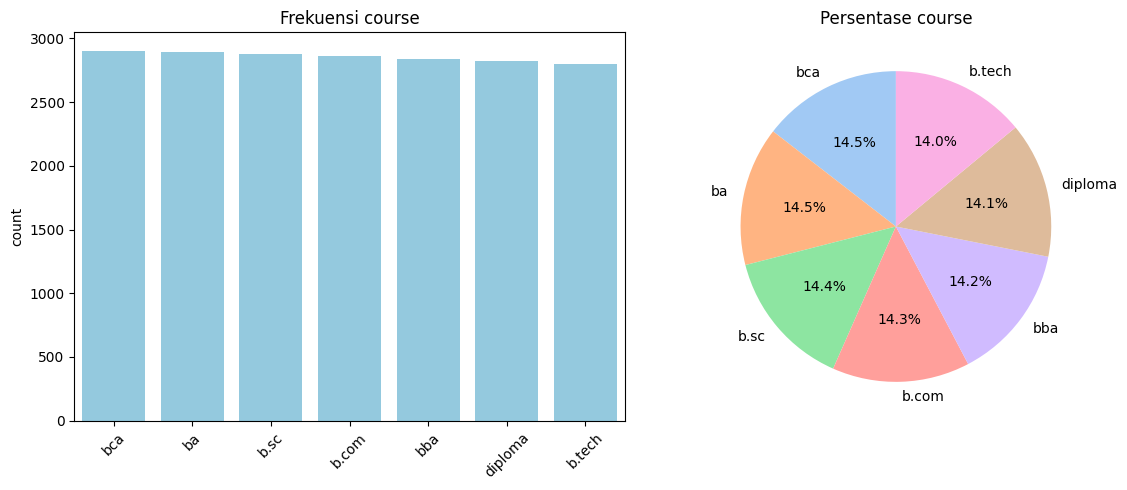

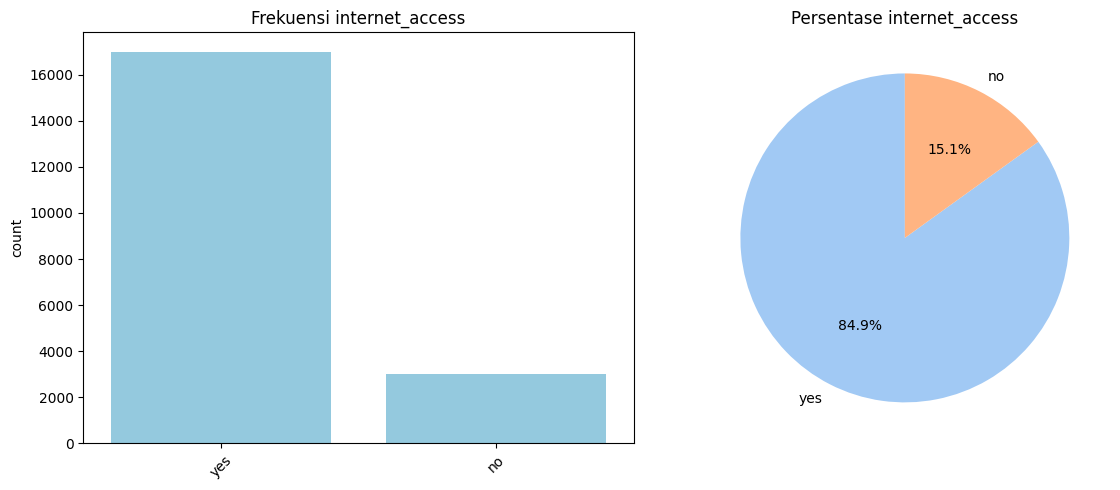

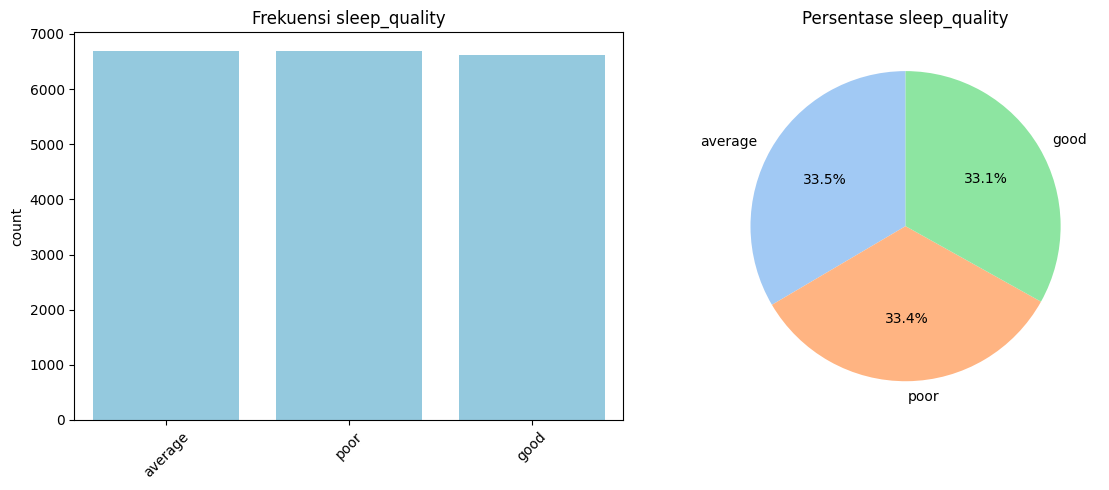

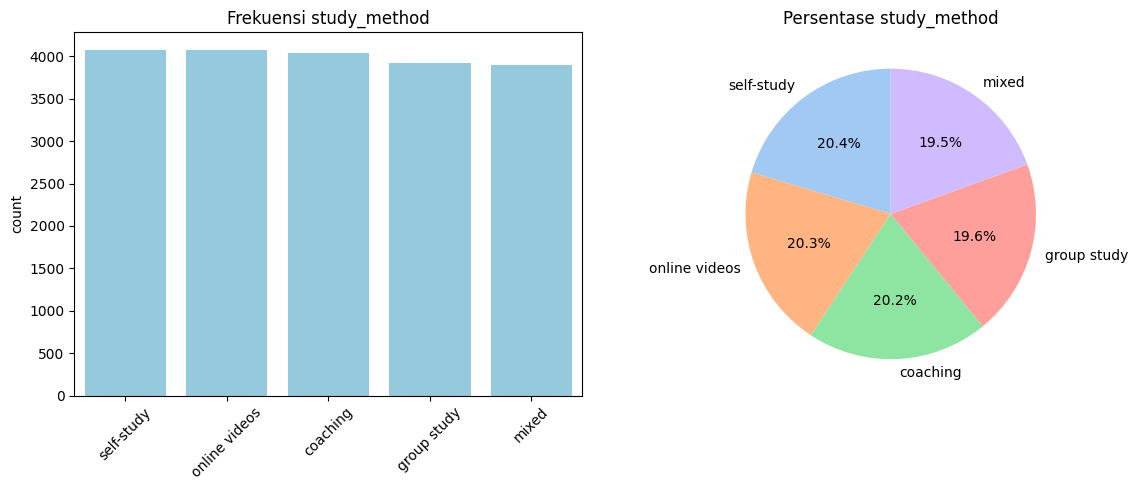

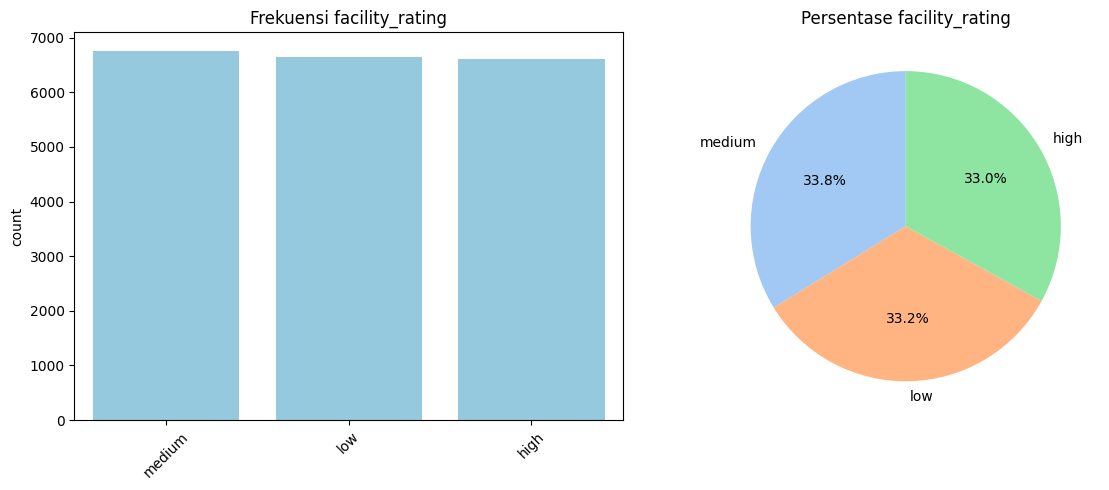

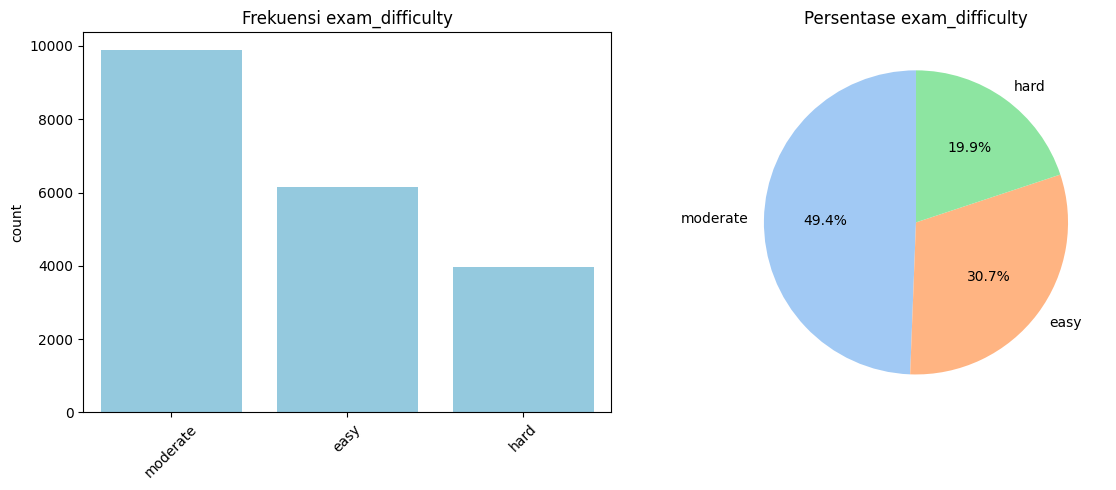

In [418]:
# kolom kategorikal
categorical_cols = df.select_dtypes(include=['object'])

for feature in categorical_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # 1. Bar Chart (Kiri)
    sns.countplot(x=df[feature], ax=ax[0], color='skyblue', order=df[feature].value_counts().index)
    ax[0].set_title(f'Frekuensi {feature}')
    ax[0].tick_params(axis='x', rotation=45) 
    ax[0].set_xlabel('')

    # 2. Pie Chart (Kanan)
    df[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                                    colors=sns.color_palette('pastel'), ax=ax[1])
    ax[1].set_title(f'Persentase {feature}')
    ax[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

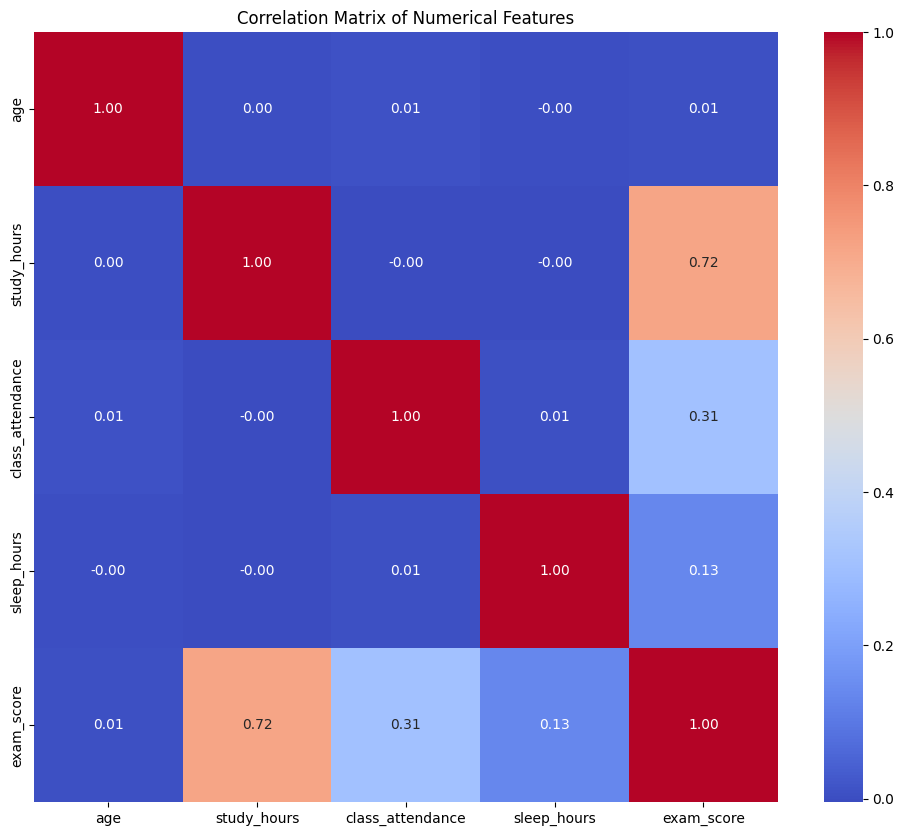

In [419]:
# Correlation Matrix
numerical_cols = df.select_dtypes(include=np.number).columns.drop('student_id')
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

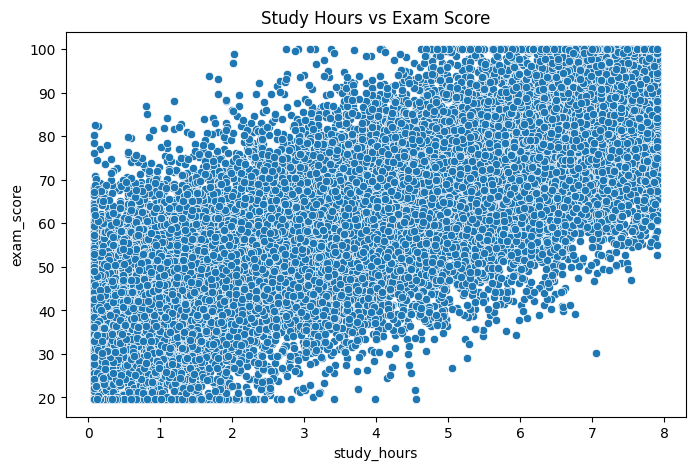

In [420]:
# Scatter Plot study_hours vs exam_score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='study_hours', y='exam_score', data=df)
plt.title('Study Hours vs Exam Score')
plt.show()

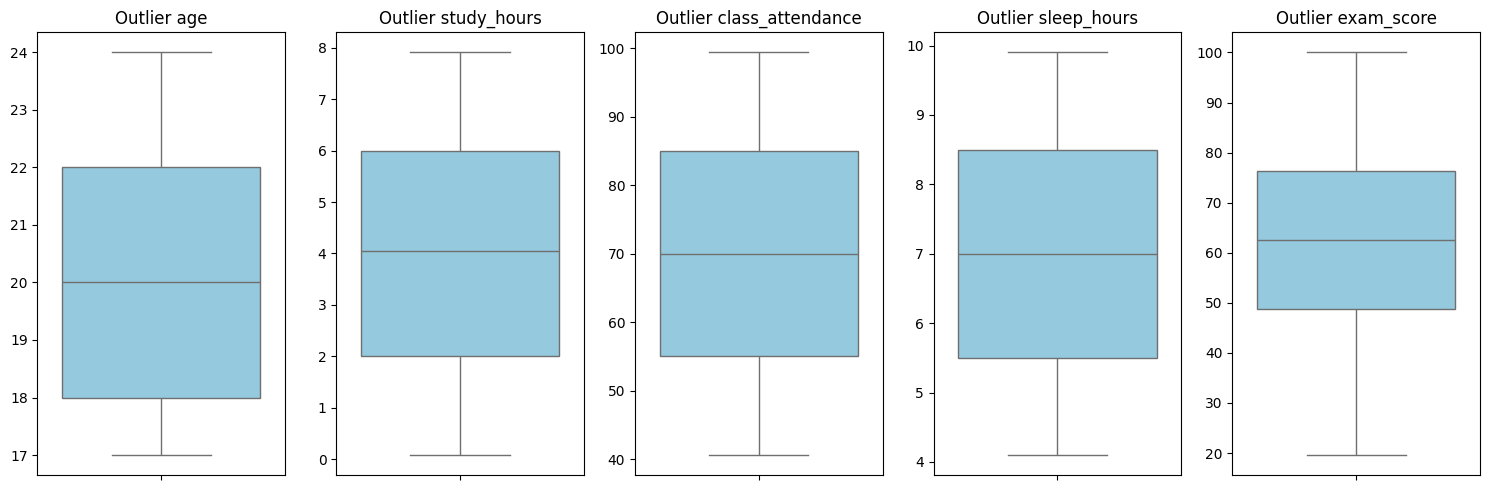

In [421]:
# Box Plot Outlier
n = len(numerical_cols)

plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, n, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Outlier {col}')
    plt.ylabel('') 

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

### Drop Duplicates

In [422]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

### Drop Columns id

In [423]:
columns_to_drop = ['student_id']
df = df.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               20000 non-null  int64  
 1   gender            20000 non-null  object 
 2   course            20000 non-null  object 
 3   study_hours       20000 non-null  float64
 4   class_attendance  20000 non-null  float64
 5   internet_access   20000 non-null  object 
 6   sleep_hours       20000 non-null  float64
 7   sleep_quality     20000 non-null  object 
 8   study_method      20000 non-null  object 
 9   facility_rating   20000 non-null  object 
 10  exam_difficulty   20000 non-null  object 
 11  exam_score        20000 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.8+ MB


### Drop Missing Values

In [424]:
df = df.dropna()
df.isnull().sum()

age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

### Drop Outlier

In [425]:
# Features to check for outliers
features_to_check = ['study_hours', 'sleep_hours']

# Delete outliers based on IQR
for feature in features_to_check:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

### Binning

In [426]:
cols_to_bin = ['age', 'sleep_hours']

df['age_binned'] = pd.cut(df['age'], bins=4, labels=['Sangat Muda', 'Muda', 'Dewasa', 'Sangat Dewasa'])
df['sleep_hours_binned'] = pd.cut(df['sleep_hours'], bins=4, labels=['Kurang', 'Cukup', 'Baik', 'Sangat Baik'])

df = df.drop(columns=cols_to_bin)

df[['age_binned', 'sleep_hours_binned']].head()

,age_binned,sleep_hours_binned
0,Sangat Muda,Baik
1,Sangat Dewasa,Kurang
2,Dewasa,Sangat Baik
3,Muda,Cukup
4,Muda,Sangat Baik


### Encoding Categorical Columns

In [427]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

encoder = OneHotEncoder(sparse_output=False, dtype=int).set_output(transform="pandas")
df_encoded = encoder.fit_transform(df[categorical_cols])
df_final = pd.concat([df.drop(columns=categorical_cols), df_encoded], axis=1)

df_final.head()

,study_hours,class_attendance,exam_score,gender_female,gender_male,gender_other,course_b.com,course_b.sc,course_b.tech,course_ba,...,exam_difficulty_hard,exam_difficulty_moderate,age_binned_Dewasa,age_binned_Muda,age_binned_Sangat Dewasa,age_binned_Sangat Muda,sleep_hours_binned_Baik,sleep_hours_binned_Cukup,sleep_hours_binned_Kurang,sleep_hours_binned_Sangat Baik
0,2.78,92.9,58.9,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,3.37,64.8,54.8,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,7.88,76.8,90.3,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
3,0.67,48.4,29.7,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,0.89,71.6,43.7,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


### Splitting

In [428]:
X = df_final.drop(columns=['exam_score'])
y = df_final['exam_score']

# splitting (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data Train: {X_train.shape[0]} baris")
print(f"Data Test: {X_test.shape[0]} baris")

Data Train: 16000 baris
Data Test: 4000 baris


In [429]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 5894 to 15795
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   study_hours                     16000 non-null  float64
 1   class_attendance                16000 non-null  float64
 2   gender_female                   16000 non-null  int64  
 3   gender_male                     16000 non-null  int64  
 4   gender_other                    16000 non-null  int64  
 5   course_b.com                    16000 non-null  int64  
 6   course_b.sc                     16000 non-null  int64  
 7   course_b.tech                   16000 non-null  int64  
 8   course_ba                       16000 non-null  int64  
 9   course_bba                      16000 non-null  int64  
 10  course_bca                      16000 non-null  int64  
 11  course_diploma                  16000 non-null  int64  
 12  internet_access_no              16

### Scaling (Standarisasi)

In [433]:
# numerical_cols = X_train.select_dtypes(include=['number']).columns
numerical_cols = ['study_hours', 'class_attendance']

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

X_train.head()

,study_hours,class_attendance,gender_female,gender_male,gender_other,course_b.com,course_b.sc,course_b.tech,course_ba,course_bba,...,exam_difficulty_hard,exam_difficulty_moderate,age_binned_Dewasa,age_binned_Muda,age_binned_Sangat Dewasa,age_binned_Sangat Muda,sleep_hours_binned_Baik,sleep_hours_binned_Cukup,sleep_hours_binned_Kurang,sleep_hours_binned_Sangat Baik
5894,1.239349,-0.756186,0,0,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
3728,1.256681,-0.889533,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
8958,0.624091,1.696234,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
7671,0.312128,-1.306966,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
5999,-0.086490,0.490316,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


# **Save Cleaned Dataset**

In [435]:
df.to_csv('Exam_Score_Prediction_preprocessing.csv', index=False)